In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
tdata = pd.read_csv('./tableinfo.csv', sep=";")
tdata

,table,values,distinct_values,mean_cardinality,avg_cell_len,avg_tableid,avg_colid,avg_rowid
0,mate_main_tokenized,37849251,0,inf,0.000000,7.257179e+07,4.684806,1.528314e+02
1,main_tokenized_embedding,87700361,768260,114.154532,1.711494,6.775167e+07,9.074454,5.946968e+01
2,main_tokenized,101529655,768260,132.155332,1.614582,6.977859e+07,9.646693,5.257549e+01
3,cocoa_main_tokenized,112772902,768260,146.790022,1.553309,7.500609e+07,9.732021,5.942166e+01
4,open_data_mate_main_tokenized,274658645,9940801,27.629428,8.696761,5.185624e+03,682.581300,6.013763e+04
5,open_data_main_tokenized,799930934,19776045,40.449490,7.986371,9.939454e+03,267.581213,1.058475e+06
6,gittables_main_tokenized,1588021298,97488581,16.289306,12.468851,8.494823e+05,18.848094,4.767343e+02


In [4]:
compdata = pd.read_csv('./compression-data.csv', sep=";")
compdata.sort_values('cells')
compdata

,cells,bytes,build_duration_nanosec,build_duration_total_nanosec,retr_duration_avg_nanosec,algorithm,table
0,129382144,2884688704,14704040631,79835824915,830,dedup_hash,open_data_mate_main_tokenized
1,177291144,6044203616,31843971692,350500281099,690,dedup_hash,gittables_main_tokenized
2,20848596,49247384,2241269823,16105632414,365,ns,main_tokenized_embedding
3,31872963,57941920,3194626385,21426254255,727,dedup_btree,cocoa_main_tokenized
4,95722960,145751056,8007490220,28699350078,1025,dedup_btree,cocoa_main_tokenized
...,...,...,...,...,...,...,...
654,54935271,760431808,9497137529,62315574573,478,ns,open_data_mate_main_tokenized
655,27469763,391850152,5199311726,53737518726,450,ns,open_data_mate_main_tokenized
656,27470572,392042528,5202047684,54204000736,400,ns,open_data_mate_main_tokenized
657,274658645,3323047312,29391296868,69197929430,635,ns,open_data_mate_main_tokenized


In [5]:
compdata['bytes_per_cell'] = compdata['bytes'] / compdata['cells']
compdata

,cells,bytes,build_duration_nanosec,build_duration_total_nanosec,retr_duration_avg_nanosec,algorithm,table,bytes_per_cell
0,129382144,2884688704,14704040631,79835824915,830,dedup_hash,open_data_mate_main_tokenized,22.295880
1,177291144,6044203616,31843971692,350500281099,690,dedup_hash,gittables_main_tokenized,34.091966
2,20848596,49247384,2241269823,16105632414,365,ns,main_tokenized_embedding,2.362144
3,31872963,57941920,3194626385,21426254255,727,dedup_btree,cocoa_main_tokenized,1.817902
4,95722960,145751056,8007490220,28699350078,1025,dedup_btree,cocoa_main_tokenized,1.522634
...,...,...,...,...,...,...,...,...
654,54935271,760431808,9497137529,62315574573,478,ns,open_data_mate_main_tokenized,13.842324
655,27469763,391850152,5199311726,53737518726,450,ns,open_data_mate_main_tokenized,14.264781
656,27470572,392042528,5202047684,54204000736,400,ns,open_data_mate_main_tokenized,14.271364
657,274658645,3323047312,29391296868,69197929430,635,ns,open_data_mate_main_tokenized,12.098827


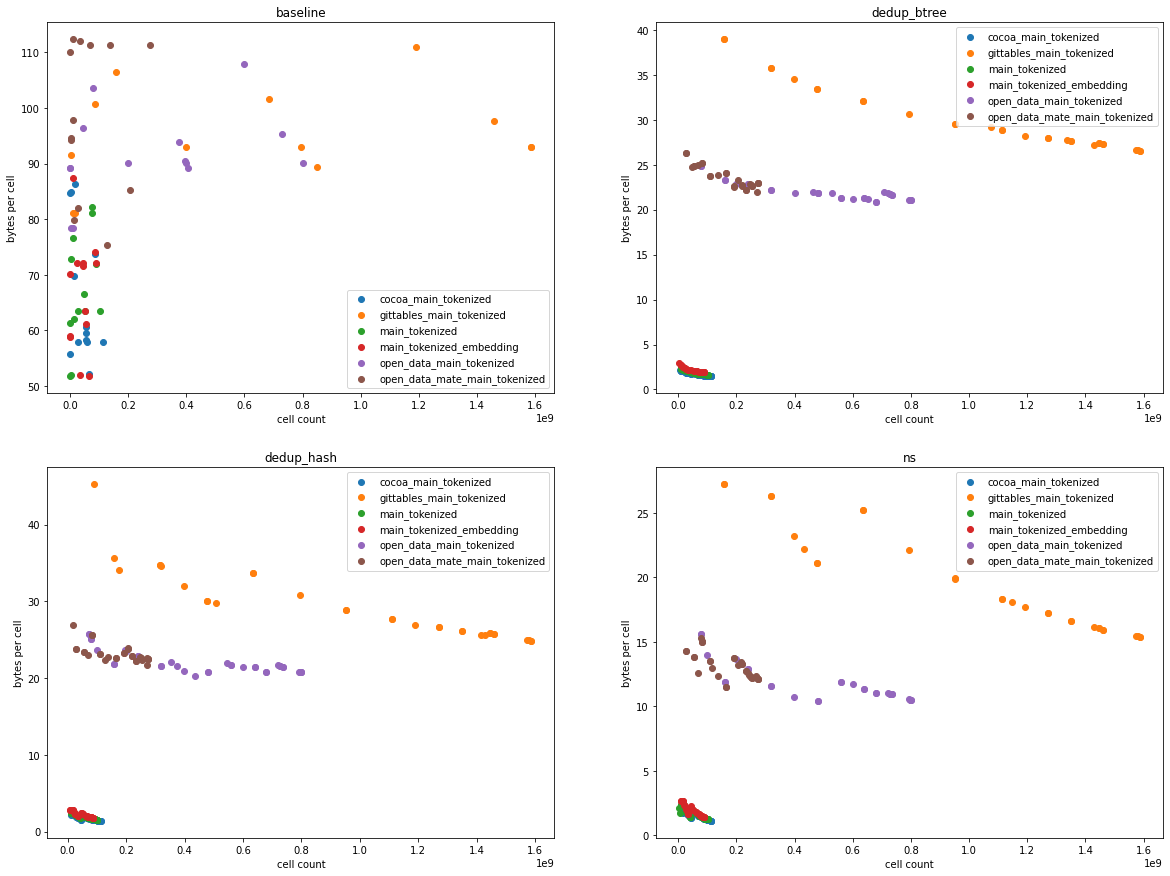

In [6]:
def flatten(ii):
    for i in ii:
        for elem in i:
            yield elem


fig, axss = plt.subplots(2, 2, figsize=(20, 15))
axs = list(flatten(axss))

# lets see if the bytes per cell are stable per algorithm and table
i = 0
for algo, arow in compdata.groupby('algorithm'):
    ax = axs[i]
    i+=1
    ax.set_title(algo)
    ax.set_xlabel('cell count')
    ax.set_ylabel('bytes per cell')

    for table, row in arow.groupby('table'):
        ax.scatter('cells', 'bytes_per_cell', data=row, label=table)

    ax.legend()
    

In [7]:
# per (algorithm x table) we want the average bytes per cell

# the compression rate is than on (algorithm x table) baseline.bytespercell / a.x.t.bytespercell


# average bytes per cell for all algorithms and tables
bpc = dict()

for axt, row in compdata.groupby(['algorithm', 'table']):
    # calculate average bytes per cell
    bpc[axt] = row['bytes_per_cell'].mean()

compressionrate = dict()
for [algo, table], value in bpc.items():
    cr = bpc[('baseline', table)] / value
    compressionrate[ ( algo, table ) ] = cr


In [12]:
tables = list(set(compdata['table']))
algos = list(set(compdata['algorithm']))
algos.sort()
algos

['baseline', 'dedup_btree', 'dedup_hash', 'ns']

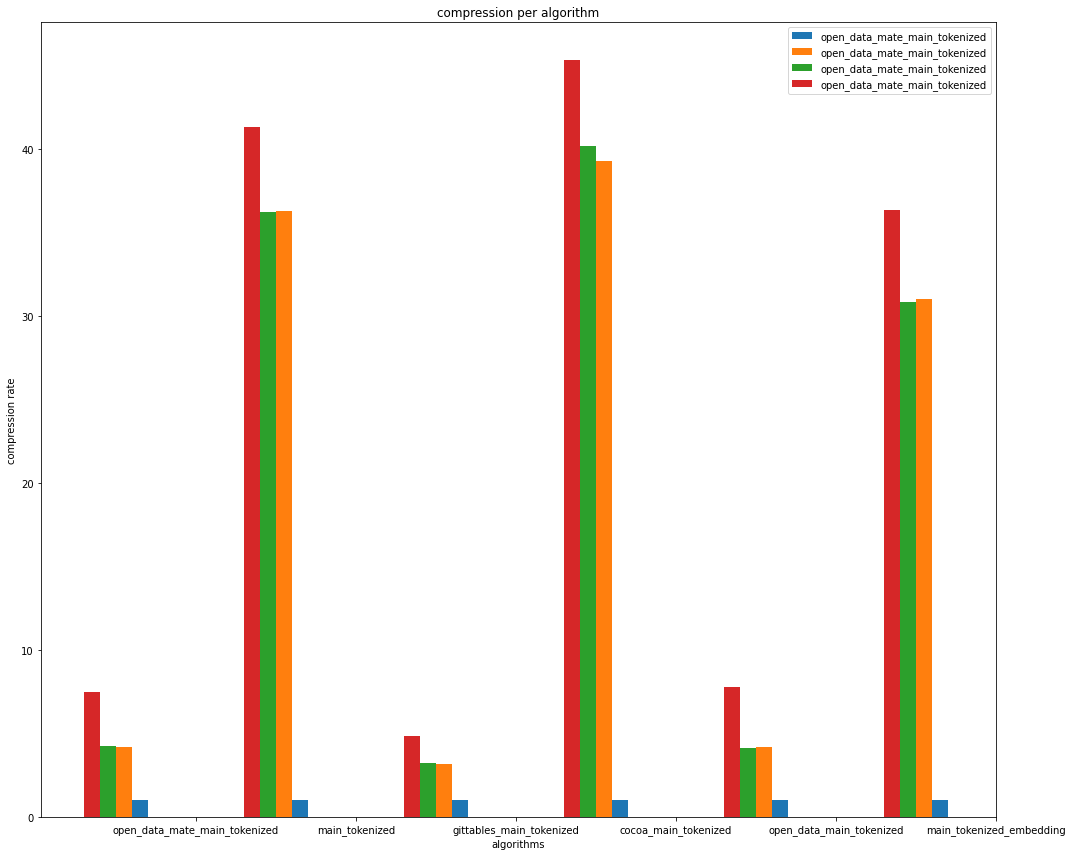

In [11]:
fig, ax = plt.subplots(figsize=(15, 12))

# TODO MAKE THIS PER TABLE -> Makes it easier to compare the algorithms
# TODO Make the same graph with actual memory size

w = 0.1
x = np.arange(len(tables))
offset = 0.35
for algo in algos:
    rates = list(map(lambda table: compressionrate[(algo, table)], tables))

    ax.bar(x - offset, rates, width=w, label=table)
    offset += w

ax.legend()
ax.set_title('compression per algorithm')
ax.set_ylabel('compression rate')
ax.set_xlabel('algorithms')
ax.xaxis.set_ticks(x, tables)

fig.tight_layout()